<a href="https://colab.research.google.com/github/starkjones/Linear-Regression-/blob/main/Advanced_ML_B_E_%7C_A_Housing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Advanced Machine Learning Belt Exam**
Option A - Housing 

Jonathan Jones 
22.06.11

#### **Objective:** The house flipping company would like you to segment the homes sold in the database and create an analytical report on the clusters describing each cluster and describing how they are different. The data has had some cleaning work to it, but you should verify that it is ready for clustering.

## **Part 1: Clustering Instructions:**

In [ ]:
# Import Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Mount google drive:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1. Load this dataset for clustering

In [ ]:
# Load training data:

data = '/content/drive/MyDrive/Colab Notebooks/Week 11/option_A_clustering_df - option_A_clustering_df.csv'

df = pd.read_csv(data)

df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.184194,47.730389


#### 2. Explore the data and clean as needed.

In [ ]:
# Convert column names to lower case for ease with with future use:

df.columns = df.columns.str.lower()

In [ ]:
# Check for duplicated rows:

df.duplicated().sum()

29

In [ ]:
# Permanet removal of dulciated rows:

df = df.drop_duplicates()

df.duplicated().sum()

0

In [ ]:
# Check for missing or NaN values:

df.isna().sum()

# No missing values!

saleprice             0
sqft1stfloor          0
sqfthalffloor         0
sqft2ndfloor          0
sqftupperfloor        0
sqfttotliving         0
sqfttotbasement       0
sqftfinbasement       0
sqftgaragebasement    0
sqftgarageattached    0
daylightbasement      0
sqftopenporch         0
sqftenclosedporch     0
sqftdeck              0
brickstone            0
bedrooms              0
bathhalfcount         0
bath3qtrcount         0
bathfullcount         0
yrbuilt               0
longitude             0
latitude              0
dtype: int64

In [ ]:
# Preliminary check datatypes and non null types:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   saleprice           4915 non-null   int64  
 1   sqft1stfloor        4915 non-null   int64  
 2   sqfthalffloor       4915 non-null   int64  
 3   sqft2ndfloor        4915 non-null   int64  
 4   sqftupperfloor      4915 non-null   int64  
 5   sqfttotliving       4915 non-null   int64  
 6   sqfttotbasement     4915 non-null   int64  
 7   sqftfinbasement     4915 non-null   int64  
 8   sqftgaragebasement  4915 non-null   int64  
 9   sqftgarageattached  4915 non-null   int64  
 10  daylightbasement    4915 non-null   int64  
 11  sqftopenporch       4915 non-null   int64  
 12  sqftenclosedporch   4915 non-null   int64  
 13  sqftdeck            4915 non-null   int64  
 14  brickstone          4915 non-null   int64  
 15  bedrooms            4915 non-null   int64  
 16  bathha

All columns are numeric and appear to have the correct data type.

In [ ]:
# Check for insconsistencies and odd numeric entries:

df.describe().round(2)

,saleprice,sqft1stfloor,sqfthalffloor,sqft2ndfloor,sqftupperfloor,sqfttotliving,sqfttotbasement,sqftfinbasement,sqftgaragebasement,sqftgarageattached,...,sqftenclosedporch,sqftdeck,brickstone,bedrooms,bathhalfcount,bath3qtrcount,bathfullcount,yrbuilt,longitude,latitude
count,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,...,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00,4915.00
mean,664544.37,1179.08,51.96,347.44,26.52,1937.45,596.63,334.98,102.33,170.88,...,8.24,148.61,4.44,3.38,0.39,0.63,1.32,1971.92,-122.27,47.57
std,298577.38,444.93,174.81,544.87,114.67,765.66,567.98,423.70,187.33,239.93,...,37.50,201.62,18.70,0.95,0.51,0.65,0.61,32.82,0.09,0.13
min,60000.00,260.00,0.00,0.00,0.00,300.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1900.00,-122.53,47.21
25%,450000.00,880.00,0.00,0.00,0.00,1390.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,3.00,0.00,0.00,1.00,1952.00,-122.35,47.49
50%,630000.00,1170.00,0.00,0.00,0.00,1770.00,560.00,110.00,0.00,0.00,...,0.00,50.00,0.00,3.00,0.00,1.00,1.00,1966.00,-122.29,47.58
75%,789950.00,1450.00,0.00,580.00,0.00,2370.00,1070.00,570.00,190.00,400.00,...,0.00,250.00,0.00,4.00,1.00,1.00,2.00,2015.00,-122.19,47.68
max,1998000.00,3600.00,2000.00,3010.00,1220.00,6695.00,3070.00,2620.00,1090.00,1830.00,...,620.00,1940.00,100.00,8.00,3.00,4.00,5.00,2019.00,-122.09,47.78


No apparent oddities in any of the columns. 

#### 3. Prepare the data for modeling

In [ ]:
# All of the data is numeric it only needs ot be scaled and transformed:

# Instantiate Standard Scaler:

scaler = StandardScaler()

# Fit and transform data:

dfs = scaler.fit_transform(df) # data frame scaled = dfs

#### 4. Use a KMeans model to cluster the houses into an optimal number of clusters. 

#### 4. a. Use an elbow plot and silhouette score to find the optimal number of clusters.

We can create a for loop to find the optimal number of clusters instead trying several values manually.

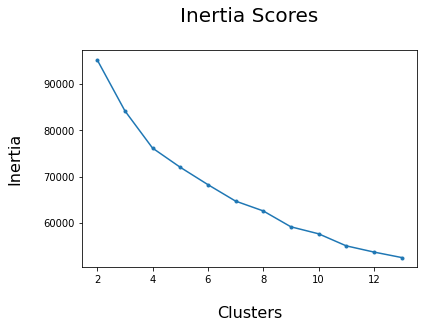

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create an empty list of interia:

inertia = []

# Loop through k values between 2 and 10:

for k in range(2,14):
  km = KMeans(n_clusters = k)
  km.fit(dfs)

# Store inertias in empty list above:
  inertia.append(km.inertia_)

# Visualize Scores:

plt.plot(range(2,14), inertia, marker = '.')
plt.title('Inertia Scores\n', fontsize =20)
plt.xlabel('\nClusters', fontsize = 16);
plt.ylabel('Inertia\n', fontsize = 16);

Analysis: from looking at the graph 4 appears to be the optimal number of clusters. The inertia scores appear to begin tapering off after 4.

#### 4. 1. Use an elbow plot and silhouette score to find the optimal number of clusters.

We can affirm or correct our findings from the Inertia graph by using a similar for loop to find the highest inertia score, which will be linked to the optimal number of clusters. 

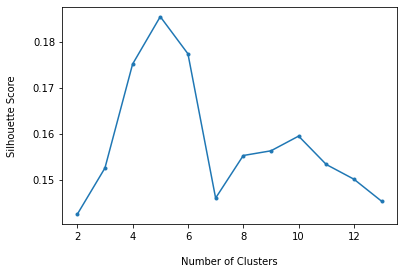

In [ ]:
# Save Silhouette scores for various cluster numbers: 

silho = []

for i in range(2, 14):
  km = KMeans(n_clusters = i)
  km.fit(dfs)

# Store inertias in empty list above:
  silho.append(silhouette_score(dfs, km.labels_))

# Plot scores:

plt.plot(range(2,14), silho, marker = '.');
plt.xlabel('\nNumber of Clusters');
plt.ylabel('Silhouette Score\n');

#### 4. 2. There must be between 2 and 10 clusters.

#### 4. 3. Explain your choice of clusters.

Analysis: It is clear that the number of clusters that yields the highest silhoutte score is either between 4 and 6, or 6 and 8. We will try both 5 an 7 for k and use the value that produces the highest score.

In [ ]:
# Instantiate Model:
km5 = KMeans(n_clusters= 5, random_state = 42)

# Fit model to Data:
km5.fit(dfs)

# Evaluate Score:
ss = silhouette_score(dfs, km5.labels_)

print('The Silhouette Score for a KMeans model with 5 clusters is: ', ss)

The Silhouette Score for a KMeans model with 5 clusters is:  0.18547137826122326


In [ ]:
# Instantiate Model:
km7 = KMeans(n_clusters= 7, random_state = 42)

# Fit model to Data:
km7.fit(dfs)

# Evaluate Score:
ss = silhouette_score(dfs, km7.labels_)

print('The Silhouette Score for a KMeans model with 7 clusters is: ', ss)

The Silhouette Score for a KMeans model with 7 clusters is:  0.1467532564441255


Analysis: 5 clusters yields the highest Silhouette score. The optimal nunmber of clusters is 5. 

#### 5. Analyze and report on the clusters.

#### 5.1. Create 2 report quality explanatory visualizations showing important differences between the clusters.

In [ ]:
# Add column to dataframe for cluster label:

df['clusters'] = km5.fit_predict(dfs)

df.head()

,saleprice,sqft1stfloor,sqfthalffloor,sqft2ndfloor,sqftupperfloor,sqfttotliving,sqfttotbasement,sqftfinbasement,sqftgaragebasement,sqftgarageattached,...,sqftdeck,brickstone,bedrooms,bathhalfcount,bath3qtrcount,bathfullcount,yrbuilt,longitude,latitude,clusters
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,220,0,6,0,2,1,1965,-122.196399,47.336118,2
1,474250,1390,0,0,0,2200,810,810,0,0,...,340,0,4,1,0,1,1945,-122.361913,47.509874,2
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,4,1,0,2,2019,-122.156684,47.437557,4
3,659000,660,0,540,0,1820,620,620,0,0,...,100,0,3,1,0,2,2016,-122.370252,47.565146,1
4,656500,2310,0,0,0,2310,0,0,0,440,...,320,0,3,0,0,2,1967,-122.184194,47.730389,3


In [ ]:
# Dataframe features grouped by cluster:

clusters = df.groupby('clusters', as_index = False).mean().round(2)

clusters

,clusters,saleprice,sqft1stfloor,sqfthalffloor,sqft2ndfloor,sqftupperfloor,sqfttotliving,sqfttotbasement,sqftfinbasement,sqftgaragebasement,...,sqftenclosedporch,sqftdeck,brickstone,bedrooms,bathhalfcount,bath3qtrcount,bathfullcount,yrbuilt,longitude,latitude
0,0,800569.38,1308.39,129.22,104.51,10.31,2074.66,1030.47,523.94,135.23,...,4.77,98.39,92.98,3.22,0.35,0.52,1.18,1947.64,-122.31,47.61
1,1,699416.97,562.32,6.34,557.29,147.26,1536.91,374.01,267.32,102.14,...,16.07,299.38,0.00,2.76,0.53,0.91,1.24,2015.92,-122.33,47.62
2,2,701105.39,1412.03,24.30,82.80,0.00,2324.22,1229.10,805.24,243.91,...,6.05,206.77,1.56,3.83,0.40,0.94,1.32,1965.34,-122.25,47.58
3,3,529702.51,1199.05,91.98,67.50,0.00,1435.27,347.10,81.28,25.96,...,7.88,67.24,0.84,3.03,0.21,0.29,1.10,1947.49,-122.28,47.55
4,4,872449.64,1375.22,30.89,1399.98,9.31,2962.28,208.49,147.62,28.90,...,5.07,90.93,0.36,4.23,0.67,0.63,2.05,2003.65,-122.20,47.55


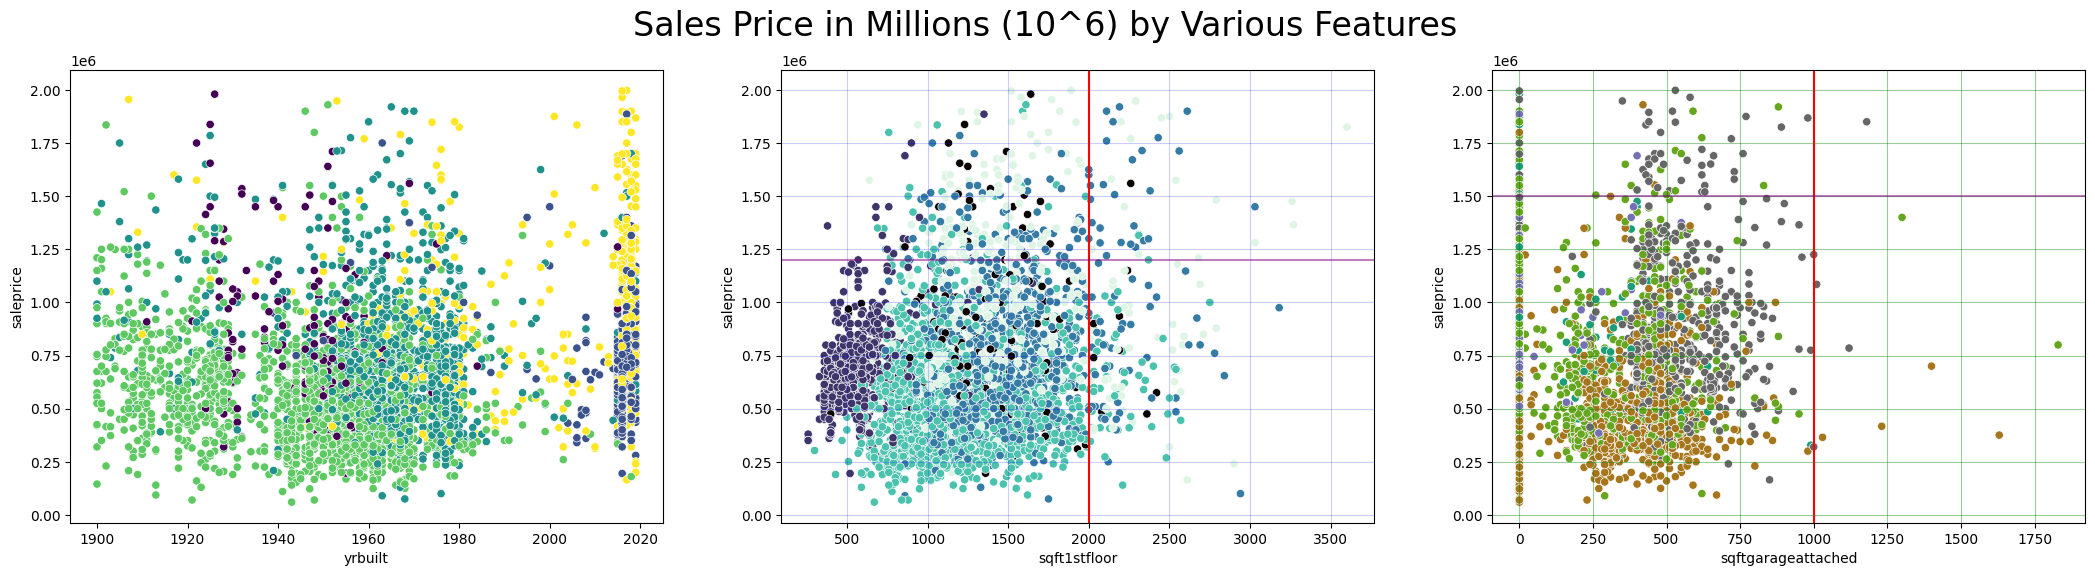

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(1, 3,figsize=(26,6), sharey=False, dpi=100);
plt.suptitle('Sales Price in Millions (10^6) by Various Features\n', fontsize=24)

sns.scatterplot(x = df['sqftgarageattached'], y = df['saleprice'], ax = axes[2], c = df['clusters'], cmap = 'Dark2', );
axes[2].axvline(x=1000, color = 'red');
axes[2].axhline(y=1500000, color = 'purple', alpha = .5);
axes[2].grid(axis= 'both', color = 'green', alpha = .4)


sns.scatterplot(x = df['sqft1stfloor'], y = df['saleprice'], ax = axes[1], c = df['clusters'], cmap = 'mako', );
axes[1].axvline(x=2000, color = 'red');
axes[1].axhline(y=1200000, color = 'purple', alpha = .5);
axes[1].grid(axis= 'both', color = 'blue', alpha = .2)

sns.scatterplot(x = df['yrbuilt'], y = df['saleprice'], ax = axes[0], c = df['clusters'], cmap = 'viridis', legend='full');

**Analysis**: 

Year built: the clusters are easier to distinguish in this graph when compared to the other two. The light green cluster spans 1900-1980, the purple cluster appears to be concentrated between the 20s and 50s. The teal cluster is concentrated over the 40-year period between 1940 to 1980 and the yellow and royal blue clusters are based int the 2000s, although the yellow cluster has several outliers, or homes built, as early as 1910. There are no clear distinctions in sales price between the groups in this format, although yellow appears to have the largest range in sales prices and the highest quantity of homes that sold for close to 2M dollars. 
First Floor Square Foot: There appears to be a positive correlation between first floor area and sales price; the majority of data points follow this trend.
Garage Square Foot: The graph shows that the attached garage size has little bearing on the home’s sales price. Most sales occur below 1.5M dollars and with garages that are less than 1000 square feet. Homes with no attached garage span price ranges from 0 to 2 million dollars. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if sys.path[0] == '':


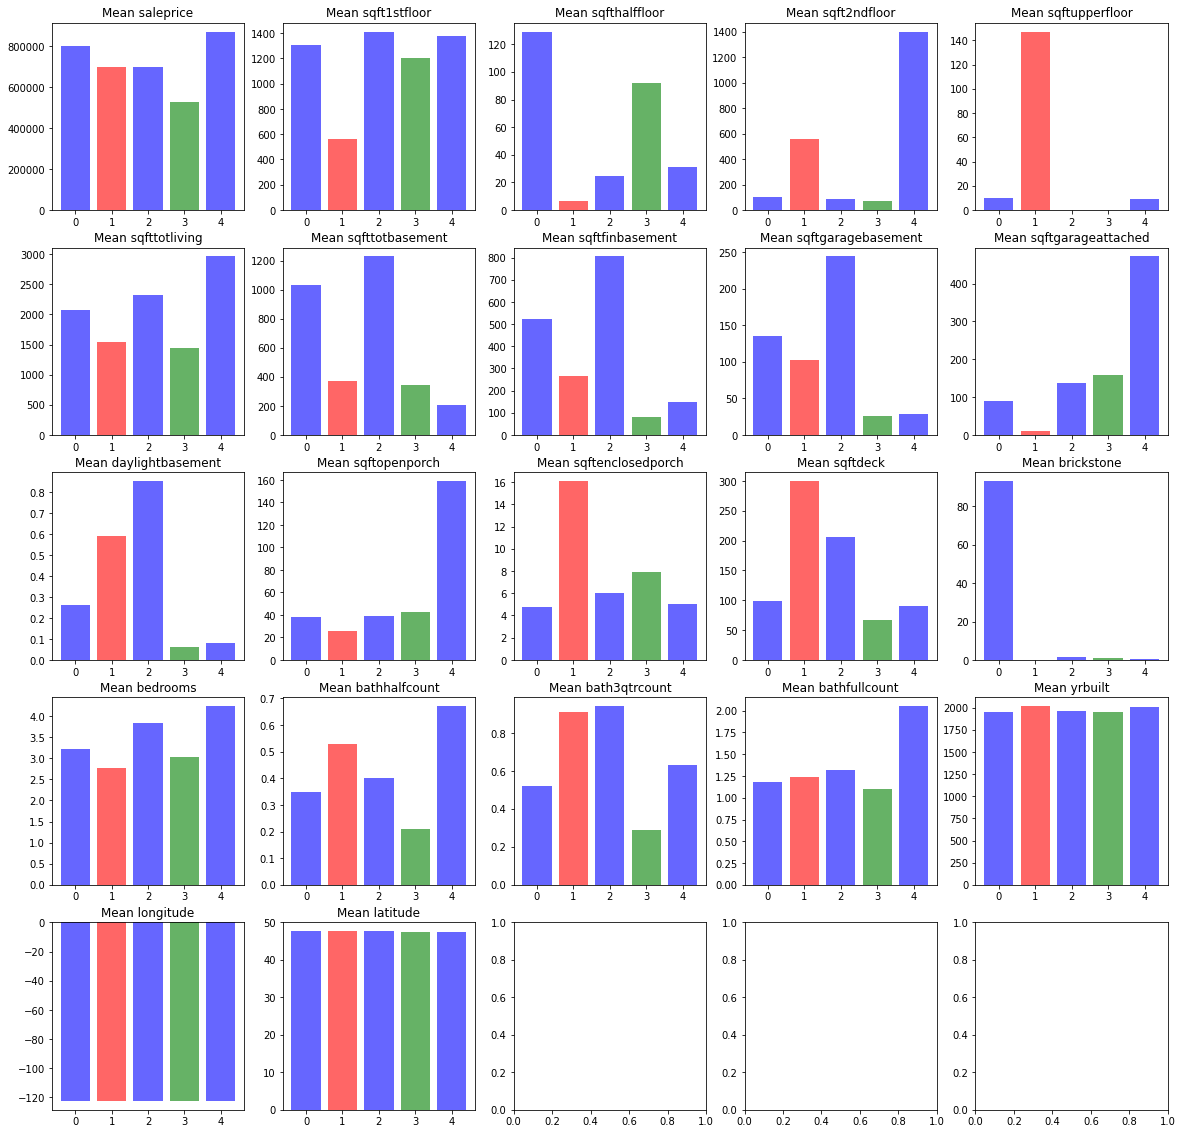

In [ ]:
# Plotting the Clusters:

fig, axes = plt.subplots(5, 5, figsize =(20, 20))

# flatten plot figure to single row array:

axes = axes.ravel()

# Loop over columns and plot each feature separately:

for i, col in enumerate(clusters.columns[1:]):
  axes[i].bar(clusters['clusters'], clusters[col], alpha =.6, color = 'BrBG');
  axes[i].set_title(f'Mean {col}');

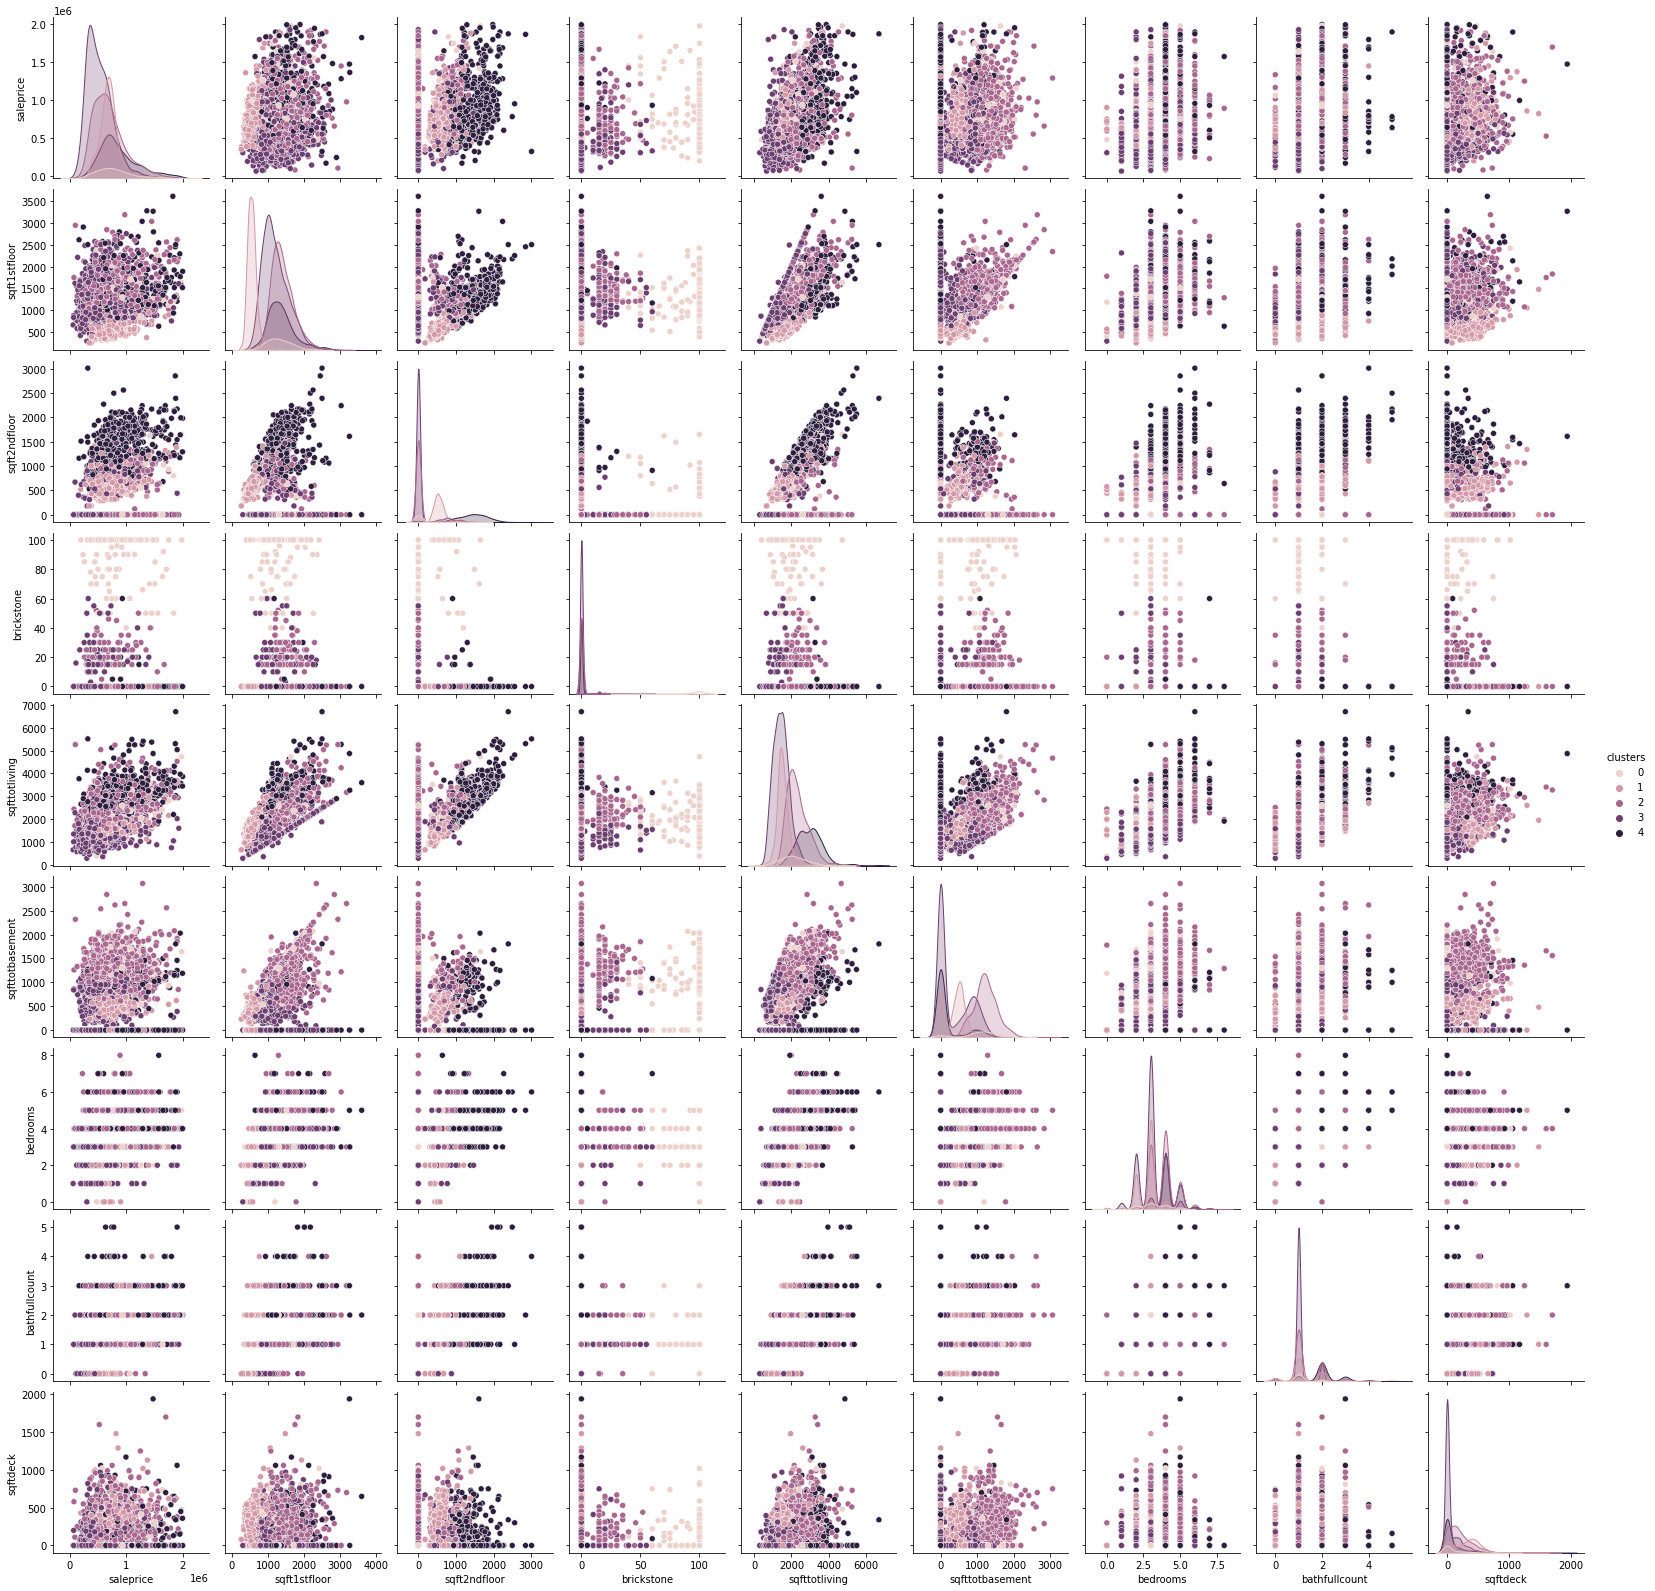

In [ ]:
# Data Frame of select features:

pp_visual = df[['saleprice', 'clusters','sqft1stfloor', 'sqft2ndfloor', 'brickstone','sqfttotliving', 'sqfttotbasement', 'bedrooms', 'bathfullcount','sqftdeck']]

sns.pairplot(pp_visual, hue = 'clusters');

###**Cluster Analysis:**

**Cluster 0**: Cluster 0 homes appear to be made primarily of brick and on average the oldest homes in the dataset. This group has a small number of homes with garages and/or homes with garages that are very small. 

**Cluster 1**: on average Cluster 1 has the largest garage space (sqft), the largest enclosed porch, the largest deck, and it has the newest buildings. Cluster 1 also has the smallest garages on average, the smallest open porches, and the smallest number of bedrooms.

**Cluster 2**: has the largest first floor area, the largest basement, the largest number of 3 quarter bathrooms. Cluster 2 homes do not appear to have upper floors and very few of them contain brick elements. 

**Cluster 3**: Cluster 3 is not a leader in any category, it appears to be a cluster of homes with some of the smallest attributes (level, room, and attachment area). Almost none of the homes in this group are built or comprised of brick and like cluster 2 these homes do not have upper floors. 

**Cluster 4**: Cluster 4 has larger 2nd floors, the biggest living rooms and garages by area, the largest open porches, bedroom counts and ½ and full bathroom counts. Like Cluster its homes are also relatively new.  From experience these features tend to be strongly correlated to home sales price and this notion is supported by cluster 4s average sales price as it is significantly higher than the rest of the groups. 


## **Part 2: Modeling Instructions:**

#### **Objective:** The house flipping company has provided new data about when the homes were sold and what businesses are nearby.  This new data has created a very large number of columns as the businesses, months sold, and years sold are all one-hot encoded.  

#### 1. Load this dataset for modeling  

In [ ]:
# Load data for deep learning model:

modeling_data = '/content/drive/MyDrive/Colab Notebooks/Week 11/option_A_modeling_df - option_A_modeling_df.csv'

dl = pd.read_csv(modeling_data) # deep learning data frame = dl

dl.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,...,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Convert column names to lower case for ease with with future use:

dl.columns = dl.columns.str.lower()

#### 3. Use random_state = 42 for your train_test_split


In [ ]:
# Set target:

X = dl.drop(columns = 'saleprice')
y = dl['saleprice']

# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### 2. This dataset is pre-cleaned, but may need to be processed before modeling. 

In [ ]:
dl.describe()

,saleprice,sqft1stfloor,sqfthalffloor,sqft2ndfloor,sqftupperfloor,sqfttotliving,sqfttotbasement,sqftfinbasement,sqftgaragebasement,sqftgarageattached,...,monthsold_07,monthsold_08,monthsold_09,monthsold_10,monthsold_11,monthsold_12,yearsold_2017,yearsold_2018,yearsold_2019,yearsold_2020
count,4.937000e+03,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,...,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,6.644969e+05,1176.440146,51.728378,348.925866,26.740531,1935.915333,595.723314,334.611708,102.511647,170.442576,...,0.082439,0.098440,0.087705,0.095605,0.091351,0.076767,0.246303,0.218756,0.270407,0.018230
std,2.979678e+05,445.949131,174.456092,544.743908,114.985746,764.987161,567.252633,422.990777,187.206721,239.709902,...,0.275060,0.297939,0.282894,0.294078,0.288137,0.266249,0.430901,0.413445,0.444215,0.133795
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.308000e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.890000e+05,1450.000000,0.000000,580.000000,0.000000,2360.000000,1070.000000,570.000000,190.000000,400.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All of the data in this dataset is numeric and although some columns have been One Hot Encoded the data set still needs to be scalled. 

In [ ]:
# Instantiate Standard Scaler:

scaler2 = StandardScaler()

# Fit and transform data:

X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

In [ ]:
# Data frame to view scaled data:

deeplearndf = pd.DataFrame(X_train, columns = X.columns)

deeplearndf.head()

,sqft1stfloor,sqfthalffloor,sqft2ndfloor,sqftupperfloor,sqfttotliving,sqfttotbasement,sqftfinbasement,sqftgaragebasement,sqftgarageattached,daylightbasement,...,monthsold_07,monthsold_08,monthsold_09,monthsold_10,monthsold_11,monthsold_12,yearsold_2017,yearsold_2018,yearsold_2019,yearsold_2020
0,-0.081440,-0.294352,-0.631897,-0.237752,-0.716563,0.152411,-0.219294,1.821808,-0.540118,-0.768693,...,-0.300711,-0.325169,3.250961,-0.328207,-0.316979,-0.286048,-0.576311,-0.529229,-0.605022,-0.136792
1,-0.576241,-0.294352,-0.631897,-0.237752,-1.316631,0.222688,-0.786454,-0.541003,-0.705770,-0.768693,...,-0.300711,-0.325169,-0.307601,-0.328207,-0.316979,-0.286048,-0.576311,-0.529229,1.652832,-0.136792
2,0.165960,1.350934,-0.631897,-0.237752,-0.116495,1.153863,-0.077503,-0.541003,-0.705770,-0.768693,...,-0.300711,-0.325169,-0.307601,3.046856,-0.316979,-0.286048,-0.576311,-0.529229,-0.605022,-0.136792
3,-0.711186,-0.294352,-0.631897,-0.237752,-0.273035,0.468659,1.245872,-0.541003,0.495206,1.300909,...,-0.300711,-0.325169,-0.307601,-0.328207,-0.316979,3.495916,-0.576311,-0.529229,-0.605022,-0.136792
4,0.031015,-0.294352,1.449046,-0.237752,0.509662,-1.042304,-0.786454,-0.541003,1.406292,-0.768693,...,-0.300711,-0.325169,-0.307601,3.046856,-0.316979,-0.286048,-0.576311,-0.529229,1.652832,-0.136792


In [ ]:
deeplearndf.describe().round(2)

,sqft1stfloor,sqfthalffloor,sqft2ndfloor,sqftupperfloor,sqfttotliving,sqfttotbasement,sqftfinbasement,sqftgaragebasement,sqftgarageattached,daylightbasement,...,monthsold_07,monthsold_08,monthsold_09,monthsold_10,monthsold_11,monthsold_12,yearsold_2017,yearsold_2018,yearsold_2019,yearsold_2020
count,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00,...,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00,3702.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,...,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.06,-0.29,-0.63,-0.24,-2.13,-1.04,-0.79,-0.54,-0.71,-0.77,...,-0.30,-0.33,-0.31,-0.33,-0.32,-0.29,-0.58,-0.53,-0.61,-0.14
25%,-0.67,-0.29,-0.63,-0.24,-0.72,-1.04,-0.79,-0.54,-0.71,-0.77,...,-0.30,-0.33,-0.31,-0.33,-0.32,-0.29,-0.58,-0.53,-0.61,-0.14
50%,0.01,-0.29,-0.63,-0.24,-0.22,-0.06,-0.53,-0.54,-0.71,-0.77,...,-0.30,-0.33,-0.31,-0.33,-0.32,-0.29,-0.58,-0.53,-0.61,-0.14
75%,0.62,-0.29,0.42,-0.24,0.55,0.82,0.56,0.48,0.95,1.30,...,-0.30,-0.33,-0.31,-0.33,-0.32,-0.29,-0.58,-0.53,1.65,-0.14
max,5.45,11.05,4.91,10.17,6.22,4.35,5.41,4.94,6.87,1.30,...,3.33,3.08,3.25,3.05,3.15,3.50,1.74,1.89,1.65,7.31


#### 4. Apply PCA to reduce the number of features.
1. Compare how many columns are present before and after PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Instantiate, fit & transform data using PCA:

pca = PCA(n_components=40)

#### 5. Do not leak data.

In [ ]:
# The model must only be fit on the trainging data:

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[-1.2586905 ,  0.18685866,  0.24504915, ..., -0.47448544,
        -0.0060409 , -0.51867567],
       [-3.48688318,  1.38304736, -1.68851229, ...,  3.29786257,
        -1.38476367, -0.79835287],
       [-2.31383858, -0.7783234 , -0.16186015, ...,  1.48828297,
        -1.97723599,  0.15010522],
       ...,
       [-2.33798251, -0.53129952,  0.28697069, ...,  1.58777593,
         0.01233894, -1.40349905],
       [-2.28267743,  0.02028158,  2.40276861, ..., -1.26893713,
        -0.5310183 , -0.56964094],
       [-2.96836441, -0.52537891, -0.35391773, ...,  2.89649492,
         0.85397404,  0.35638403]])

In [ ]:
# Column check PCA model DataFrame

X_train.shape

(3702, 40)

**Analysis**: 

The original dataset had 171 columns including the target. Application of Principal Component Analysis reduced the number of columns to 40. The individual impact of components above 50 is negligible. I decided to reduce the number of columns by a 3/4s to speed up processing time. I used 40 because it is easier to work with during Sequential Model layer formation and neuron selection. 

#### 6. Use a deep learning model to predict the selling price of the houses.
1. Create 3 different versions of a sequential model.
> 1. Each new model should be an iteration on the previous model.
> 2. Justify in writing why you changed what you did for each new model. (For example, why did you add layers, regularization, nodes, etc)





In [ ]:
# Import Libraries:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras import metrics
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Construct a function that prints all 4 metrics:
# Adapted from Josh Johnson

def evaluate_model(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae.round(2)},\n MSE {mse.round(2)},\n RMSE: {rmse.round(2)},\n R^2: {r2.round(2)} ')

In [ ]:
# Learning history plotting function:

def plot_history(history):
  """Plots the metrics of a model's learning progression or history"""

  metrics = history.history.keys()

  for metric in metrics:
    if not 'val' in metric:
      plt.plot(history.history[f'{metric}'], label = f'{metric}')
      if f'val_{metric}' in metrics:
        plt.plot(history.history[f'val_{metric}'], label = f'val_{metric}')
        plt.title(f'{metric}')
        plt.show()

In [ ]:
inputshape = X_train.shape[1]
inputshape

40

### **Model 1 Standard Sequential:**

In [ ]:
# Model instantiation:
sm = Sequential()

# First hidden layer: 
sm.add(Dense(40, activation = 'relu', input_dim = inputshape))

# Second - half the neurons of the 1st layer:
sm.add(Dense(20, activation = 'relu'))

# Third - half of the neurons from layer 2:
sm.add(Dense(10, activation = 'relu'))

# Output layer - single layer for regression problem:
sm.add(Dense(1, activation = 'linear'))

# Network Summary:
sm.summary()

# Compile the model:
sm.compile(optimizer= 'adam', loss = 'mse', metrics= 'mae')

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 40)                1640      
                                                                 
 dense_90 (Dense)            (None, 20)                820       
                                                                 
 dense_91 (Dense)            (None, 10)                210       
                                                                 
 dense_92 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,681
Trainable params: 2,681
Non-trainable params: 0
_________________________________________________________________


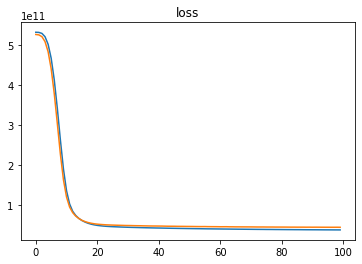

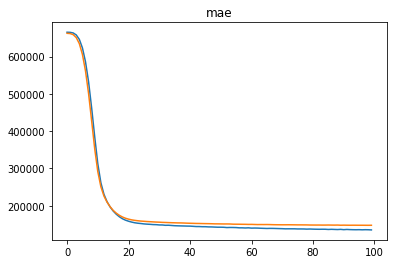

In [ ]:
# Model fit:

history = sm.fit(X_train, y_train, 
                 validation_data = (X_test, y_test),
                 epochs = 100,
                 verbose = 0)

# Plot history for model 1:

plot_history(history)

In [ ]:
# Model 1 Evaluation:

prediction1 = sm.predict(X_test)

eval1 = evaluate_model(y_test, prediction1)

MAE 147678.95,
 MSE 43632022475.76,
 RMSE: 208882.8,
 R^2: 0.5 


#### **Model 1 Analysis:**
Model 1 is exhibiting high variance. It appears to perform slightly better on the training data. On the test set it is producing a relatively large 147,000-dollar error and an R2 score of 0.50. 

To reduce the variance or overfitting I will train the model with fewer epochs and dropout regularization. 

### **Model 2 with Regularization | Dropout 50%:**

Dropout Regularization with 30% probability - each neuron in the layer above has a 30% probability of being dropped. 

In [ ]:
# Import dropout:

from tensorflow.keras.layers import Dropout

# Model instantiation:
sm2 = Sequential()

# First hidden layer - 170 neurons: 
sm2.add(Dense(40, activation = 'relu', input_dim = inputshape))

sm2.add(Dropout(.30)) # Dropout layer

# Second - half the neurons of the 1st layer:
sm2.add(Dense(20, activation = 'relu'))

sm2.add(Dropout(.30)) # Dropout layer

# Third - roughly half of the neurons from layer 2:
sm2.add(Dense(10, activation = 'relu'))

sm2.add(Dropout(.30)) # Dropout layer

# Output layer - single layer for regression problem:
sm2.add(Dense(1, activation = 'linear'))

# Network Summary:
sm2.summary()

# Compile the model:
sm2.compile(optimizer= 'adam', loss = 'mse', metrics= 'mae')

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 40)                1640      
                                                                 
 dropout_55 (Dropout)        (None, 40)                0         
                                                                 
 dense_102 (Dense)           (None, 20)                820       
                                                                 
 dropout_56 (Dropout)        (None, 20)                0         
                                                                 
 dense_103 (Dense)           (None, 10)                210       
                                                                 
 dropout_57 (Dropout)        (None, 10)                0         
                                                                 
 dense_104 (Dense)           (None, 1)               

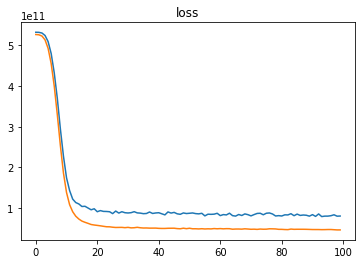

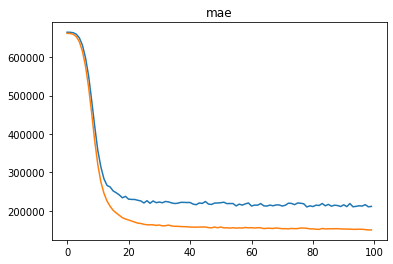

In [ ]:
# Model 2 fit:

history2 = sm2.fit(X_train, y_train, 
                 validation_data = (X_test, y_test),
                 epochs = 100,
                 verbose = 0)

# Plot history for model 2:

plot_history(history2)

In [ ]:
# Model 2 Evaluation:

prediction2 = sm2.predict(X_test)

eval2 = evaluate_model(y_test, prediction2)

MAE 149951.07,
 MSE 46804056466.66,
 RMSE: 216342.45,
 R^2: 0.46 


####**Model 2 Analysis:**
Both the training and testing performance decreased slightly, especially the training data; errors increased slightly and r2 score decreased. Model 2 needs more complexity to address the exhibited bias.

I will decrease the dropout probability to 10% from 30% to include more neurons in the calculation and train the model for more cycles.


### **Model 3 with Regularization | Dropout 25%:**

In [ ]:
# Model instantiation:
sm3 = Sequential()

# First hidden layer - 170 neurons: 
sm3.add(Dense(40, activation = 'relu', input_dim = inputshape))

sm3.add(Dropout(.10)) # Dropout layer

# Second - half the neurons of the 1st layer or 85:
sm3.add(Dense(20, activation = 'relu'))

sm3.add(Dropout(.10)) # Dropout layer

# # # Third - roughly half of the neurons from layer 2:
sm3.add(Dense(10, activation = 'relu'))

sm3.add(Dropout(.10)) # Dropout layer

# Output layer - single layer for regression problem:
sm3.add(Dense(1, activation = 'linear'))

# Network Summary:
sm3.summary()

# Compile the model:
sm3.compile(optimizer= 'adam', loss = 'mse', metrics= 'mae')

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 40)                1640      
                                                                 
 dropout_58 (Dropout)        (None, 40)                0         
                                                                 
 dense_106 (Dense)           (None, 20)                820       
                                                                 
 dropout_59 (Dropout)        (None, 20)                0         
                                                                 
 dense_107 (Dense)           (None, 10)                210       
                                                                 
 dropout_60 (Dropout)        (None, 10)                0         
                                                                 
 dense_108 (Dense)           (None, 1)               

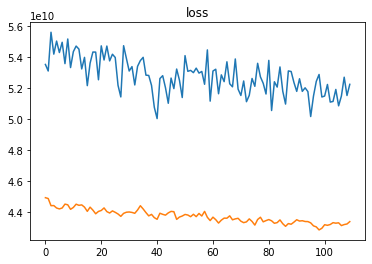

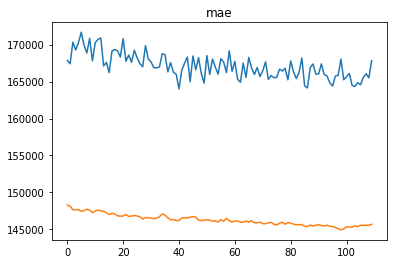

In [ ]:
# Import Early Stopping from tensorflow:

# from tensorflow.keras.callbacks import EarlyStopping

# estop = EarlyStopping(patience =3)

# Model 3 fit:

history3 = sm3.fit(X_train, y_train, 
                 validation_data = (X_test, y_test),
                 epochs = 110, verbose = 0)
                #  callbacks = [estop])

# Plot history for model 3:

plot_history(history3)

#### 7. Choose a final model and justify your choice.

#### **Analysis**: Model performs the best out of the group. It is my model of choice.

#### 8. Evaluate your final model with multiple metrics.

In [ ]:
# Model 3 Evaluation:

prediction3 = sm3.predict(X_test)

eval3 = evaluate_model(y_test, prediction3)

MAE 145670.78,
 MSE 43394128969.58,
 RMSE: 208312.58,
 R^2: 0.5 


#### 9. Based on those metrics, explain in writing how well your model will solve the business problem.

#### **Model 3 Analysis & Business Recommendations:**

The performance has improved from model 2 and is slightly better than the performance of the first model. Model 3 exhibits the least amount of variance and bias; it has the best balance of the group. The Mean Absolute Error has also decreased from 147678.95 to 145670.78 even though the R2 value remains at 0.50. Reduction in the dropout probability from 30% to 10% undoubtedly helped to remedy the undertraining from the second model. I also attempted to reduce the number of epochs to 90 and implement early stopping with a patience of three to end the training once the testing error began increasing, but these efforts had an adverse effect. 


Without PCA, using all 170 columns, the model produces an R2 value of .65 and Mean Absolute Error of 119586.18 in the first iteration and a MAE of in the final model 118075.62.

With errors beyond 100,000 dollars I would recommend agasint using this model as a sole means for purchasing decisions, but the houseing company could use it as a baramoter to sift through market noise and hone in/focus on promising properties of interest. 
